<a href="https://colab.research.google.com/github/ThivyaTS/cnc-colab-data-versioning/blob/main/cnc_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


# 1. Data Exploration


---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/cnc-project/data_v1_train/train.csv')
train.head()

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0   1      wax         6             4.0         unworn                 yes   
1   2      wax        20             4.0         unworn                 yes   
2   3      wax         6             3.0         unworn                 yes   
3   4      wax         6             2.5         unworn                  no   
4   5      wax        20             3.0         unworn                  no   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                      NaN  
4                      NaN

### a. Basic cleaning

In [ ]:
mapping = {'Prep': 0,
 'Layer 1 Up': 1,
 'Layer 1 Down': 2,
 'Repositioning': 3,
 'Layer 2 Up': 4,
 'Layer 2 Down': 5,
 'Layer 3 Up': 6,
 'Layer 3 Down': 7,
 'End': 8}



---


### **ii. combining data from train.csv into respective experiment data**


---



In [ ]:
frames = []
for i in range(1,19):
    ex_num = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("/content/drive/MyDrive/cnc-project/data_v1_experiment/experiment_{}.csv".format(ex_num))

    ex_result_row = train[train['No'] == i]

    frame['Machining_Process'].replace(mapping, inplace=True)

    frame['feedrate'] = ex_result_row.iloc[0]['feedrate']
    frame['clamp_pressure'] = ex_result_row.iloc[0]['clamp_pressure']
    frame['machining_finalized'] = ex_result_row.iloc[0]['machining_finalized']
    frame['tool_condition'] = ex_result_row.iloc[0]['tool_condition']
    frame['material']= ex_result_row.iloc[0]['material']
    frames.append(frame)

<ipython-input-6-36376871>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Machining_Process'].replace(mapping, inplace=True)
<ipython-input-6-36376871>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
frames[0]

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0                 198.0              0.000                   0.00   
1                 198.0            -10.800                -350.00   
2                 196.0            -17.800                  -6.25   
3                 194.0            -18.000                   0.00   
4                 193.0            -17.900                 -18.80   
...                 ...                ...                    ...   
1050              141.0              0.175                  87.50   
1051              141.0             -0.150                 -87.50   
1052              141.0             -0.175                 -87.50   
1053              141.0              0.150                  87.50   
1054              141.0              0.175                  93.70   

      X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0                  198.0                 0.0                0.000000   
1                  198.0               -13.6             -358.000000   
2                  196.0               -17.9               -0.000095   
3                  194.0               -17.9               -0.000095   
4                  192.0               -17.9                0.000095   
...                  ...                 ...                     ...   
1050               141.0                 0.0                0.000000   
1051               141.0                 0.0                0.000000   
1052               141.0                 0.0                0.000000   
1053               141.0                 0.0                0.000000   
1054               141.0                 0.0                0.000000   

      X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                   0.18           0.0207             329.0              2.77   
1                 -10.90           0.1860             328.0             23.30   
2                  -8.59           0.1400             328.0             30.60   
3                  -6.11           0.1300             327.0             30.30   
4                  -5.70           0.1140             328.0             30.50   
...                  ...              ...               ...               ...   
1050               -2.84           0.0522             325.0              7.39   
1051               -1.85           0.0522             325.0              2.69   
1052               -2.20           0.0527             325.0              2.22   
1053               -4.02           0.0502             326.0              5.80   
1054               -4.23           0.0547             329.0              5.97   

      ...  S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
0     ...              12.0                        1.0                 0.0   
1     ...              12.0                        1.0                 4.0   
2     ...              12.0                        1.0                 7.0   
3     ...              12.0                        1.0                 7.0   
4     ...              12.0                        1.0                 7.0   
...   ...               ...                        ...                 ...   
1050  ...              12.0                        1.0               132.0   
1051  ...              12.0                        1.0               132.0   
1052  ...              12.0                        1.0               132.0   
1053  ...              12.0                        1.0               132.0   
1054  ...              12.0                        1.0               132.0   

      M1_CURRENT_FEEDRATE  Machining_Process  feedrate  clamp_pressure  \
0                    50.0           Starting         6             4.0   
1                    50.0                  0         6             4.0   
2                    50.0                  0         6             4.0   
3                    50.0                  0         6             4.0   
4                    50.0       



---


### **ii. combining all the experiment data into one Dataframe by column**


---



In [ ]:
combined_df = pd.concat(frames, axis=0)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

<Axes: title={'center': 'Tool Condition Distribution'}, xlabel='tool_condition'>

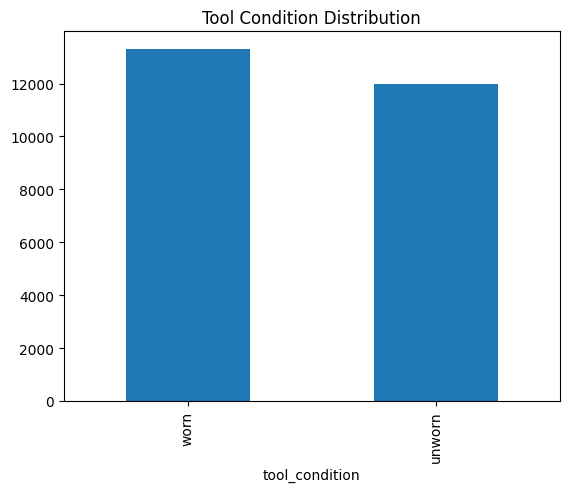

In [ ]:
combined_df['tool_condition'].value_counts().plot(kind='bar', title='Tool Condition Distribution')



---

### iii. **basic pre-processing to convert the object types into int**
---

In [ ]:
# Selecting object (categorical) columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Printing unique values for each categorical column
for col in cat_cols:
    print(f"Column: {col}")
    print(combined_df[col].unique())  # or use .value_counts() for frequencies
    print("\n")

Column: Machining_Process
['Starting' 0 1 2 3 4 5 6 7 'end' 8]


Column: machining_finalized
['yes' 'no']


Column: tool_condition
['unworn' 'worn']


Column: material
['wax']




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select object (categorical) columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))
    label_encoders[col] = le  # Save encoders for inverse transform later

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

In [ ]:
path = '/content/drive/MyDrive/cnc-project/data_v2_combined/combined_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  combined_df.to_csv(f)



---


## b. Basic Structure Check


---



In [ ]:
combined_df.describe()

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean          159.052045          -0.288657               0.094264   
std            19.330873           5.658260              93.877623   
min           141.000000         -20.400000           -1280.000000   
25%           145.000000          -2.050000             -31.300000   
50%           153.000000           0.000000               0.000000   
75%           162.000000           0.200000              25.000000   
max           198.000000          50.700000            1440.000000   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
count        25286.000000        25286.000000            25286.000000   
mean           159.050700           -0.283076                0.253215   
std             19.331144            5.664309               72.594951   
min            141.000000          -20.000000            -1000.000000   
25%            145.000000           -2.050000                0.000000   
50%            153.000000            0.000000                0.000000   
75%            162.000000            0.000000                0.000000   
max            198.000000           50.000000             1000.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
count        25286.000000     2.528600e+04      25286.000000   
mean            -0.469714     6.603073e-02        326.945859   
std              4.220750     3.700384e-02          1.459937   
min            -23.400000     2.780000e-19        320.000000   
25%             -3.930000     4.150000e-02        326.000000   
50%             -0.666000     6.680000e-02        327.000000   
75%              3.140000     9.130000e-02        327.000000   
max             27.100000     3.800000e-01        331.000000   

       X1_OutputVoltage  ...  S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  \
count      25286.000000  ...           25286.0               25286.000000   
mean           7.986942  ...              12.0                   1.003441   
std            7.710379  ...               0.0                   0.349055   
min            0.000000  ...              12.0                   0.000000   
25%            2.590000  ...              12.0                   1.000000   
50%            7.140000  ...              12.0                   1.000000   
75%           10.200000  ...              12.0                   1.000000   
max           75.400000  ...              12.0                   4.000000   

       M1_sequence_number  M1_CURRENT_FEEDRATE  Machining_Process  \
count        25286.000000         25286.000000       25286.000000   
mean            47.345013            16.542039           3.899114   
std             43.826214            19.620219           2.482190   
min              0.000000             3.000000           0.000000   
25%              2.000000             3.000000           2.000000   
50%             39.000000             6.000000           4.000000   
75%             85.000000            20.000000           6.000000   
max            135.000000            50.000000          10.000000   

           feedrate  clamp_pressure  machining_finalized  tool_condition  \
count  25286.000000    25286.000000         25286.000000    25286.000000   
mean       7.123942        3.368168             0.914538        0.526299   
std        6.167036        0.615639             0.279574        0.499318   
min        3.000000        2.500000             0.000000        0.000000   
25%        3.000000        3.000000             1.000000        0.000000   
50%        3.000000        3.000000             1.000000        1.000000   
75%        6.000000        4.000000             1.000000        1.000000   
max       20.000000        4.000000             1.000000        1.000000   

       material  
count   25286.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.

In [ ]:
combined_df.isnull().sum()

X1_ActualPosition            0
X1_ActualVelocity            0
X1_ActualAcceleration        0
X1_CommandPosition           0
X1_CommandVelocity           0
X1_CommandAcceleration       0
X1_CurrentFeedback           0
X1_DCBusVoltage              0
X1_OutputCurrent             0
X1_OutputVoltage             0
X1_OutputPower               0
Y1_ActualPosition            0
Y1_ActualVelocity            0
Y1_ActualAcceleration        0
Y1_CommandPosition           0
Y1_CommandVelocity           0
Y1_CommandAcceleration       0
Y1_CurrentFeedback           0
Y1_DCBusVoltage              0
Y1_OutputCurrent             0
Y1_OutputVoltage             0
Y1_OutputPower               0
Z1_ActualPosition            0
Z1_ActualVelocity            0
Z1_ActualAcceleration        0
Z1_CommandPosition           0
Z1_CommandVelocity           0
Z1_CommandAcceleration       0
Z1_CurrentFeedback           0
Z1_DCBusVoltage              0
Z1_OutputCurrent             0
Z1_OutputVoltage             0
S1_ActualPosition            0
S1_ActualVelocity            0
S1_ActualAcceleration        0
S1_CommandPosition           0
S1_CommandVelocity           0
S1_CommandAcceleration       0
S1_CurrentFeedback           0
S1_DCBusVoltage              0
S1_OutputCurrent             0
S1_OutputVoltage             0
S1_OutputPower               0
S1_SystemInertia             0
M1_CURRENT_PROGRAM_NUMBER    0
M1_sequence_number           0
M1_CURRENT_FEEDRATE          0
Machining_Process            0
feedrate                     0
clamp_pressure               0
machining_finalized          0
tool_condition               0
material                     0
dtype: int64



---

## **c. Target Variable Exploration (tool_condition)**


---



<Axes: title={'center': 'Tool Condition Distribution (1 : worn , 0 : unworn)'}, xlabel='tool_condition'>

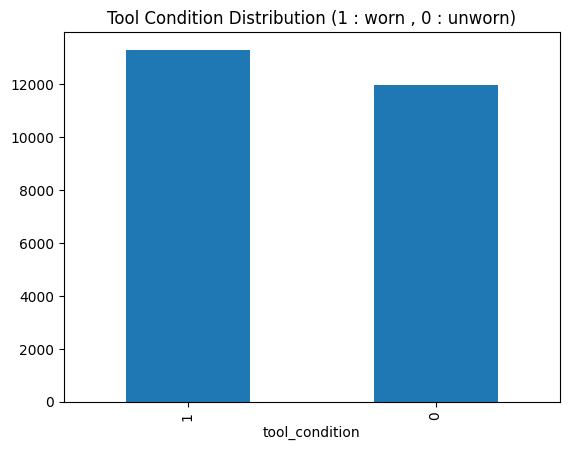

In [ ]:
combined_df['tool_condition'].value_counts().plot(kind='bar', title='Tool Condition Distribution (1 : worn , 0 : unworn)')



---


## **d. Correlation Analysis**


---



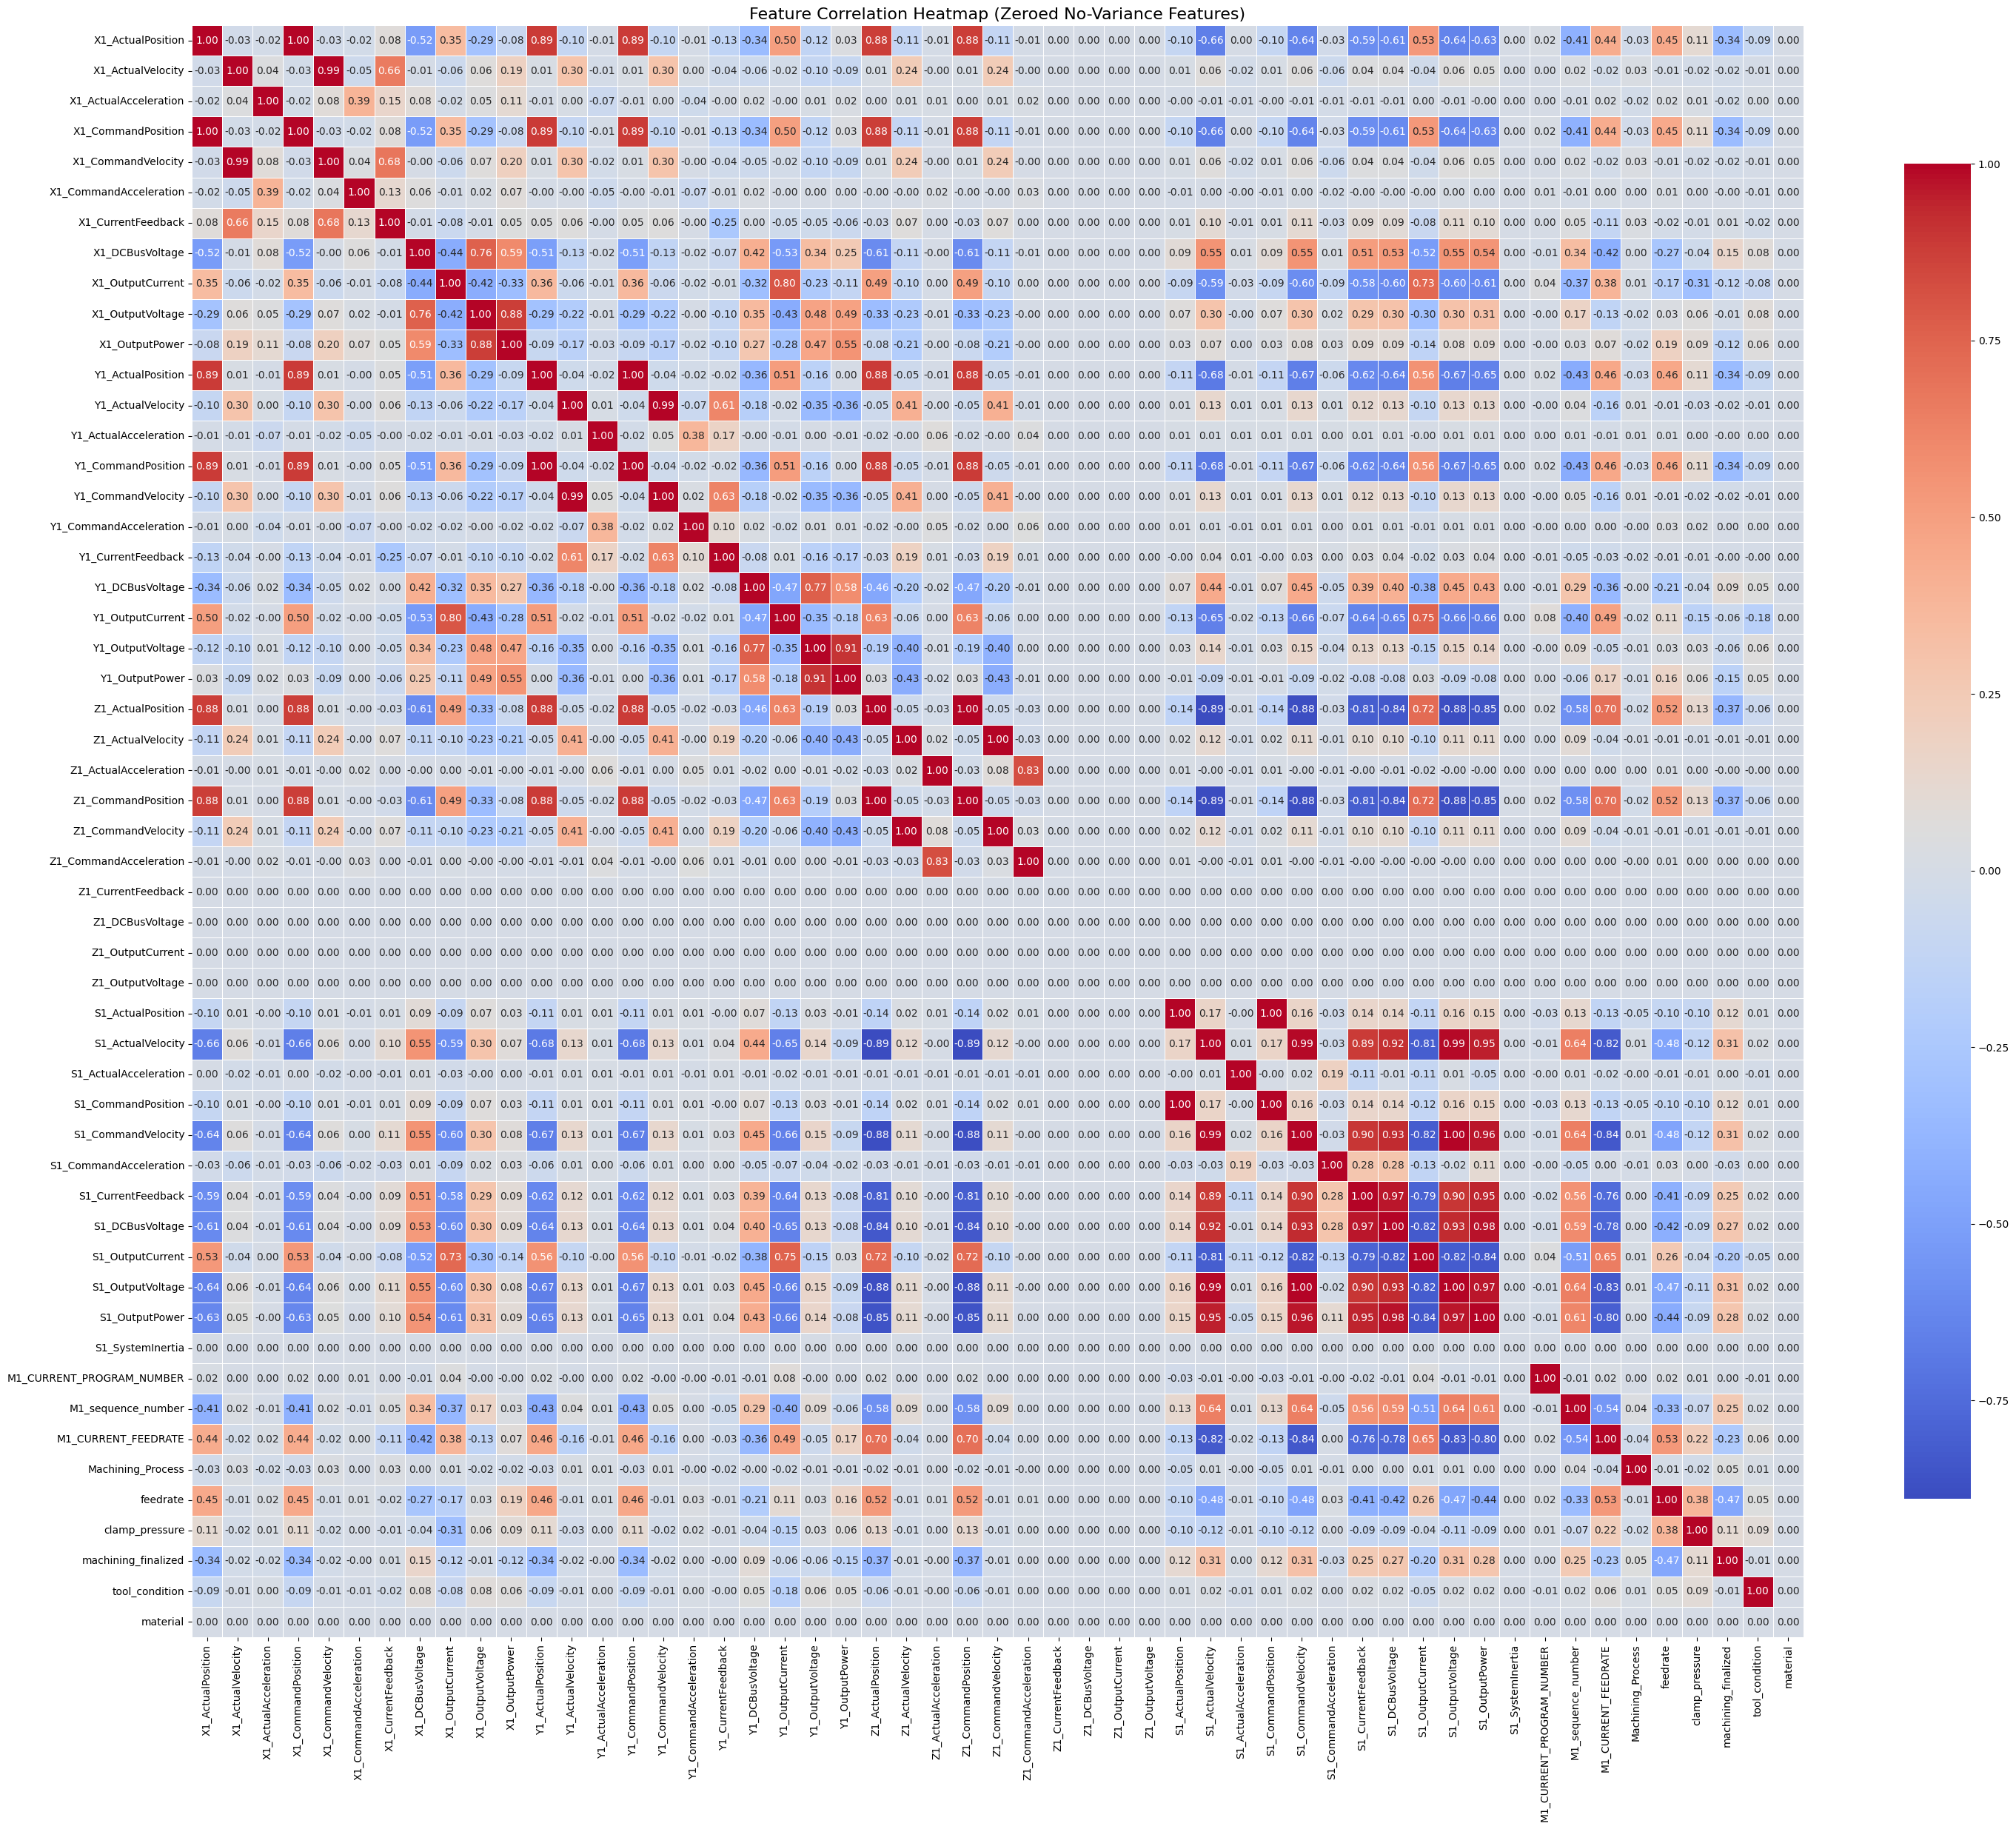

In [ ]:
# Identify features with no variance
no_variance_cols = combined_df.loc[:, combined_df.nunique() == 1].columns

# Compute the correlation matrix
corr_matrix = combined_df.corr()

# Set correlation to 0 for no-variance features (rows and columns)
for col in no_variance_cols:
    corr_matrix.loc[col, :] = 0
    corr_matrix.loc[:, col] = 0

# Plot the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap (Zeroed No-Variance Features)", fontsize=16)
plt.tight_layout()
plt.show()



---


## **e. Time-Series Plots (for sensor signals)**


---



array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

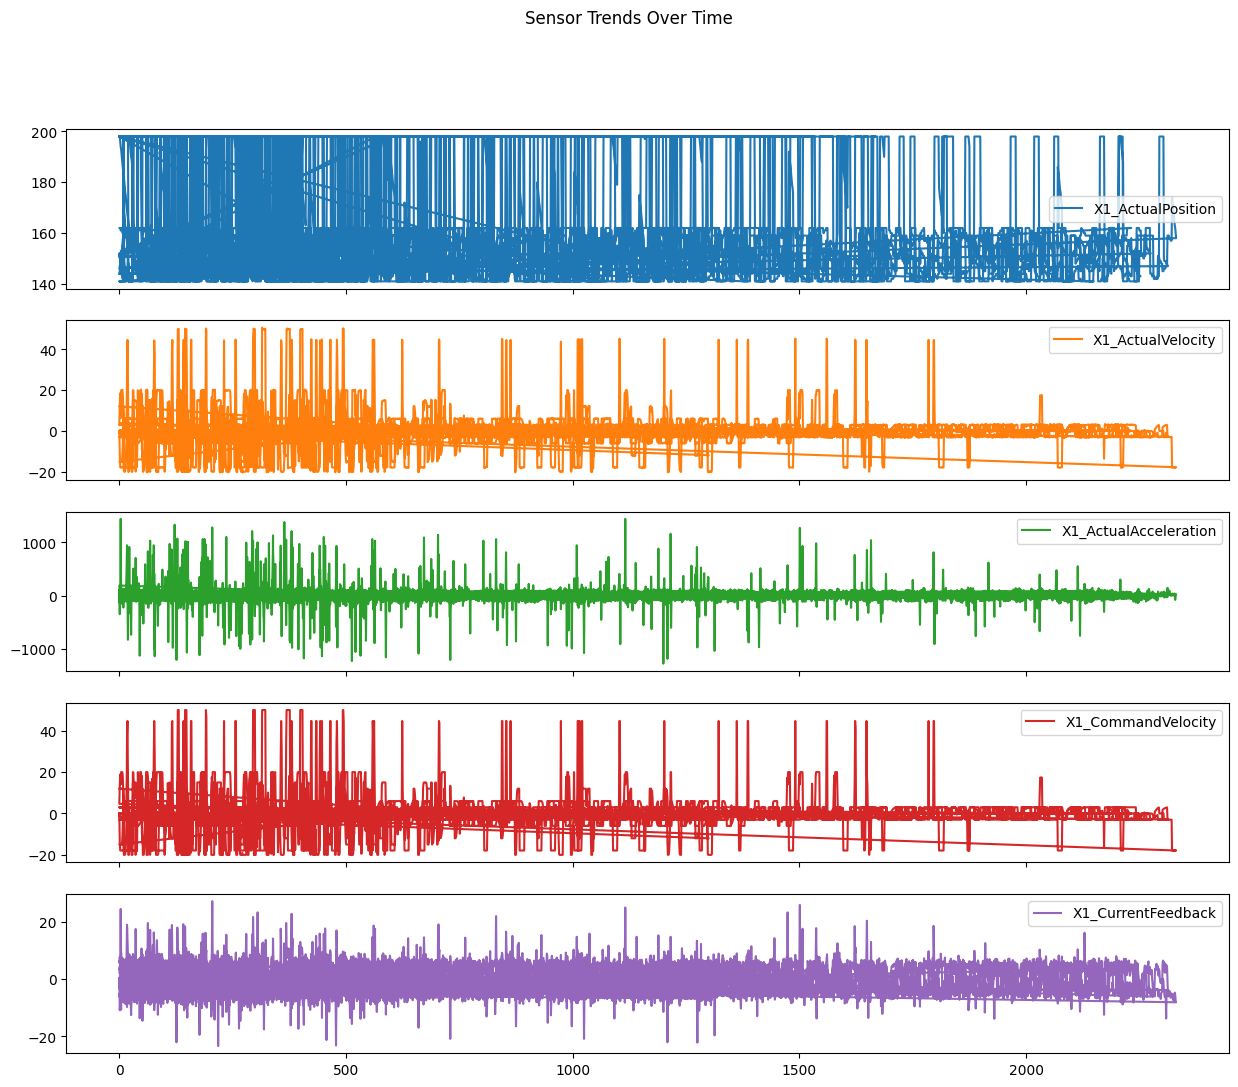

In [ ]:
sensor_cols_X = ['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
               'X1_CommandVelocity', 'X1_CurrentFeedback']

combined_df[sensor_cols_X].plot(subplots=True, figsize=(15, 12), title='Sensor Trends Over Time')


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

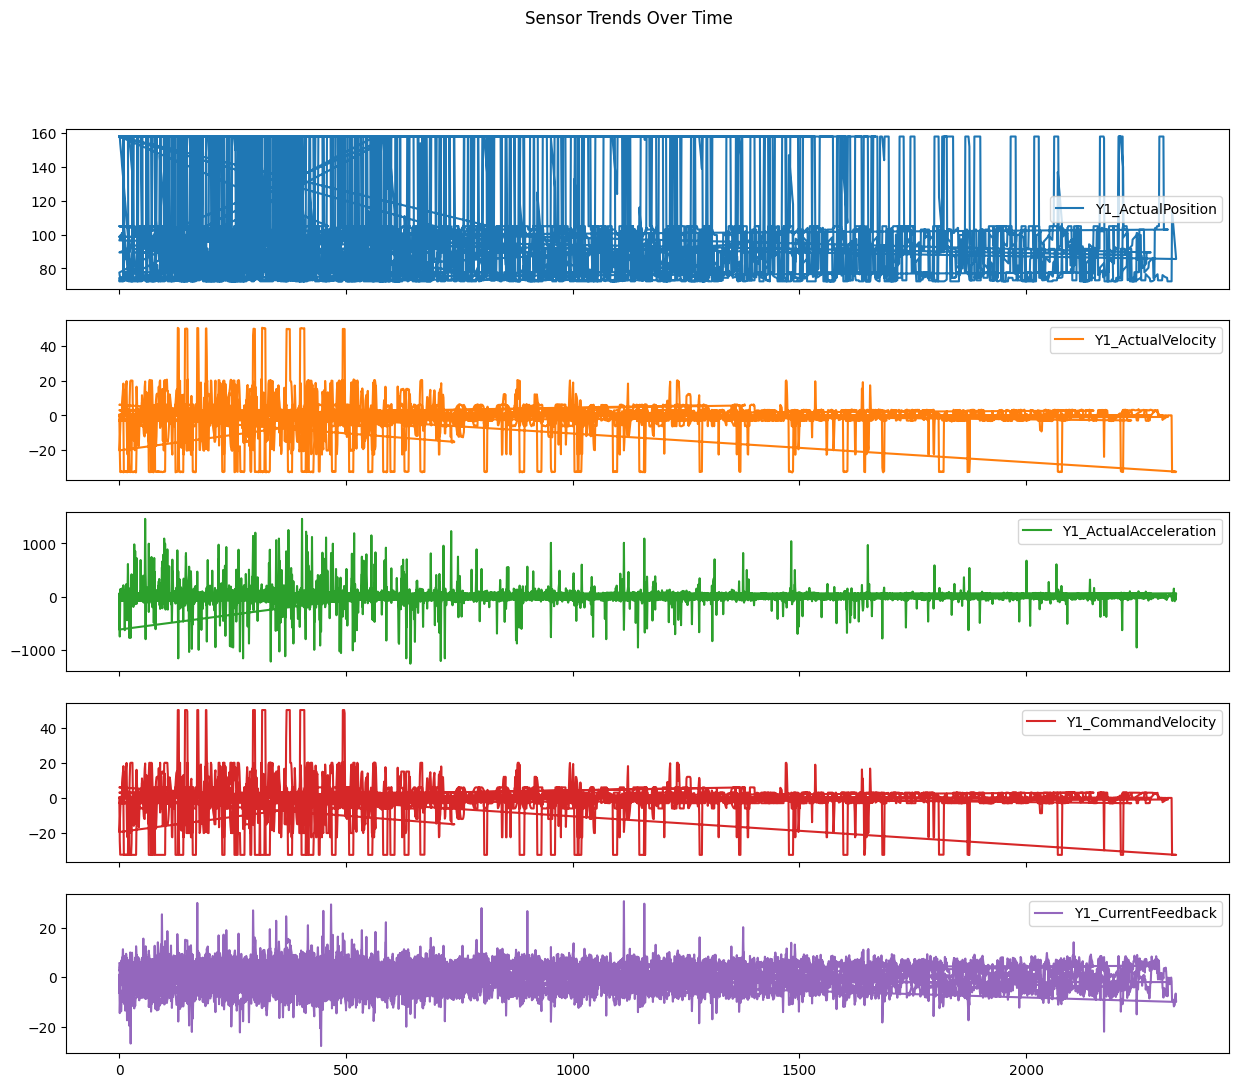

In [ ]:
sensor_cols_y = ['Y1_ActualPosition', 'Y1_ActualVelocity', 'Y1_ActualAcceleration',
               'Y1_CommandVelocity', 'Y1_CurrentFeedback']

combined_df[sensor_cols_y].plot(subplots=True, figsize=(15, 12), title='Sensor Trends Over Time')


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

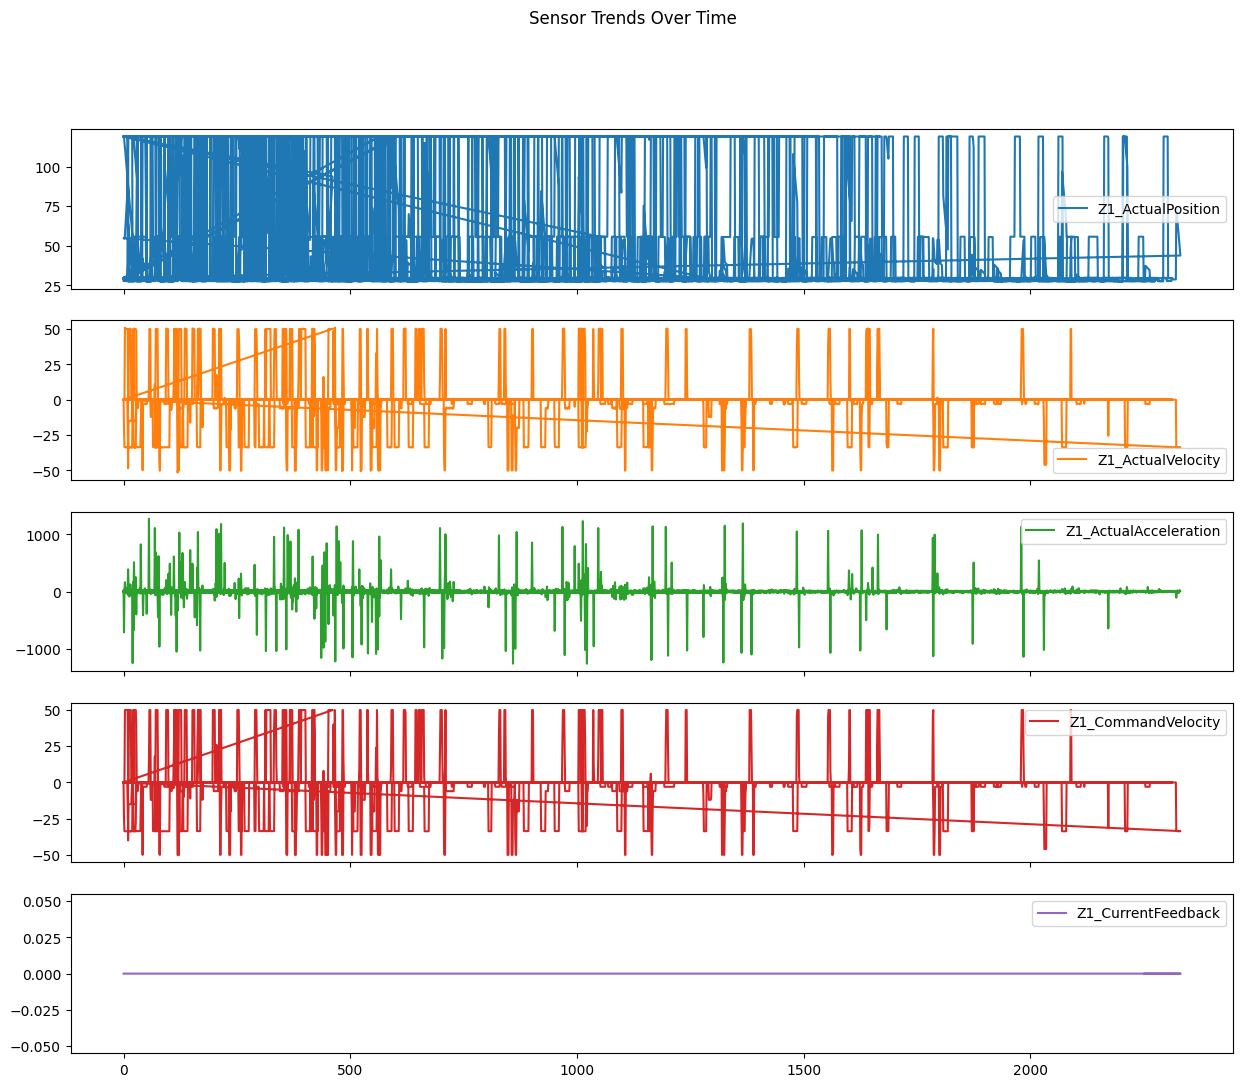

In [ ]:
sensor_cols_Z = ['Z1_ActualPosition', 'Z1_ActualVelocity', 'Z1_ActualAcceleration',
               'Z1_CommandVelocity', 'Z1_CurrentFeedback']

combined_df[sensor_cols_Z].plot(subplots=True, figsize=(15, 12), title='Sensor Trends Over Time')


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

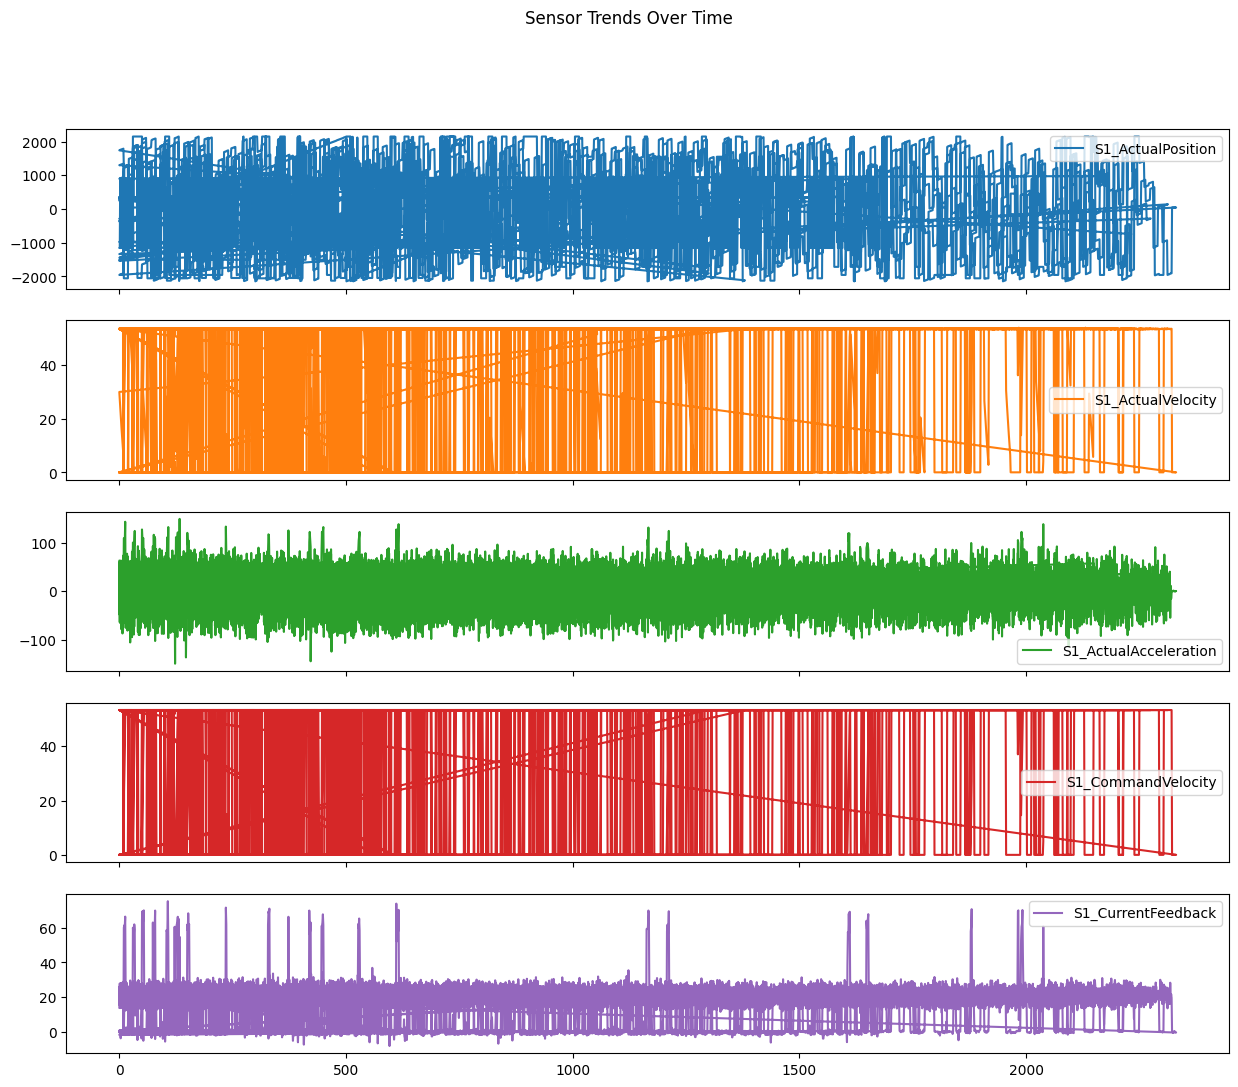

In [ ]:
sensor_cols_s = ['S1_ActualPosition', 'S1_ActualVelocity', 'S1_ActualAcceleration',
               'S1_CommandVelocity', 'S1_CurrentFeedback']

combined_df[sensor_cols_s].plot(subplots=True, figsize=(15, 12), title='Sensor Trends Over Time')




---


## **f. Distribution Analysis**


---



array([[<Axes: title={'center': 'X1_OutputCurrent'}>,
        <Axes: title={'center': 'X1_OutputVoltage'}>],
       [<Axes: title={'center': 'X1_ActualVelocity'}>, <Axes: >]],
      dtype=object)

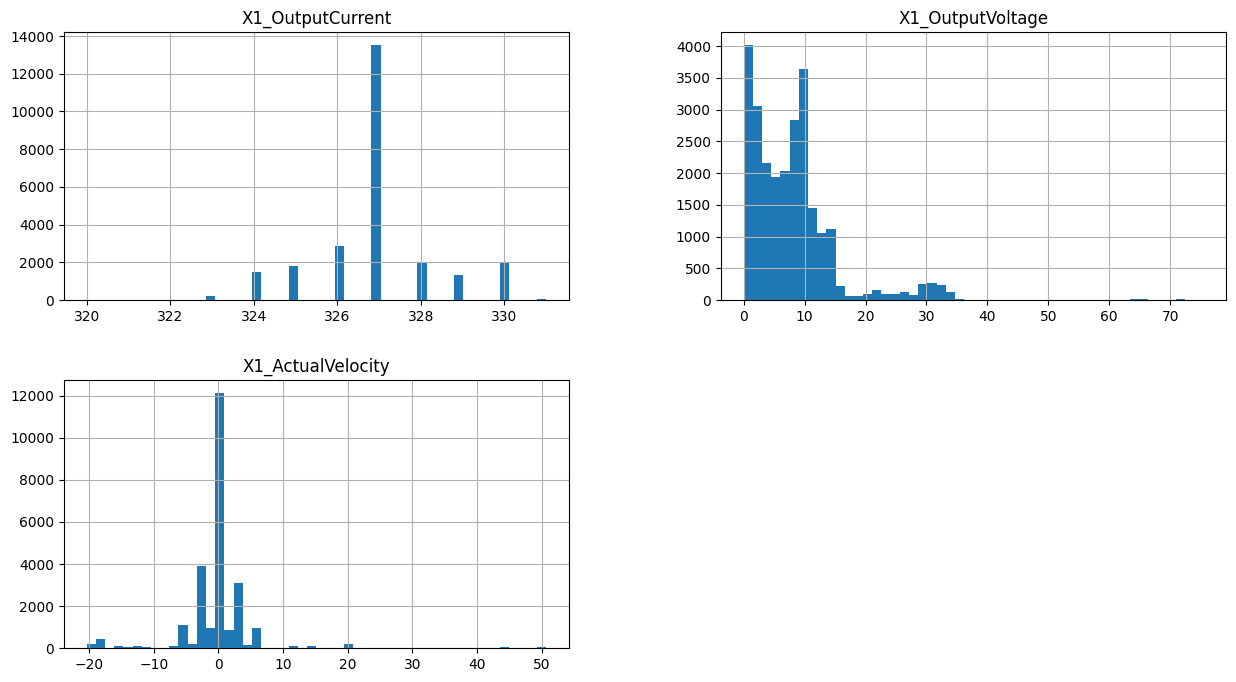

In [ ]:
combined_df[['X1_OutputCurrent', 'X1_OutputVoltage', 'X1_ActualVelocity']].hist(bins=50, figsize=(15,8))

array([[<Axes: title={'center': 'Y1_OutputCurrent'}>,
        <Axes: title={'center': 'Y1_OutputVoltage'}>],
       [<Axes: title={'center': 'Y1_ActualVelocity'}>, <Axes: >]],
      dtype=object)

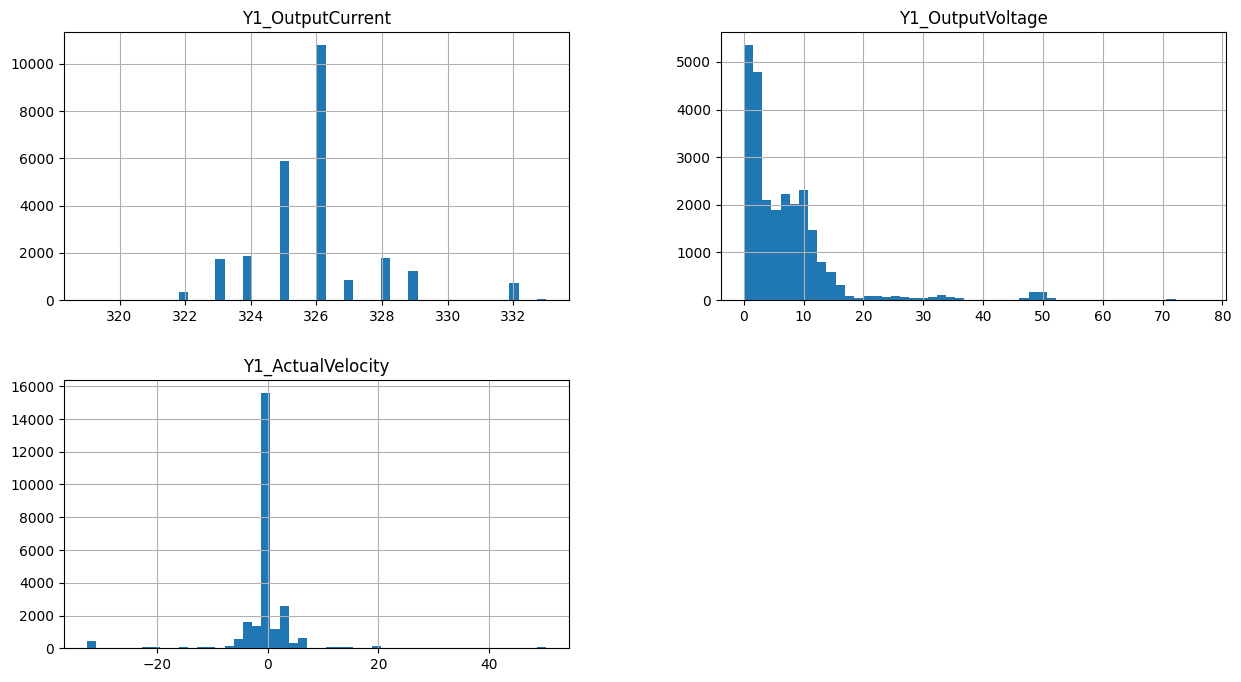

In [ ]:
combined_df[['Y1_OutputCurrent', 'Y1_OutputVoltage', 'Y1_ActualVelocity']].hist(bins=50, figsize=(15,8))

array([[<Axes: title={'center': 'Z1_OutputCurrent'}>,
        <Axes: title={'center': 'Z1_OutputVoltage'}>],
       [<Axes: title={'center': 'Z1_ActualVelocity'}>, <Axes: >]],
      dtype=object)

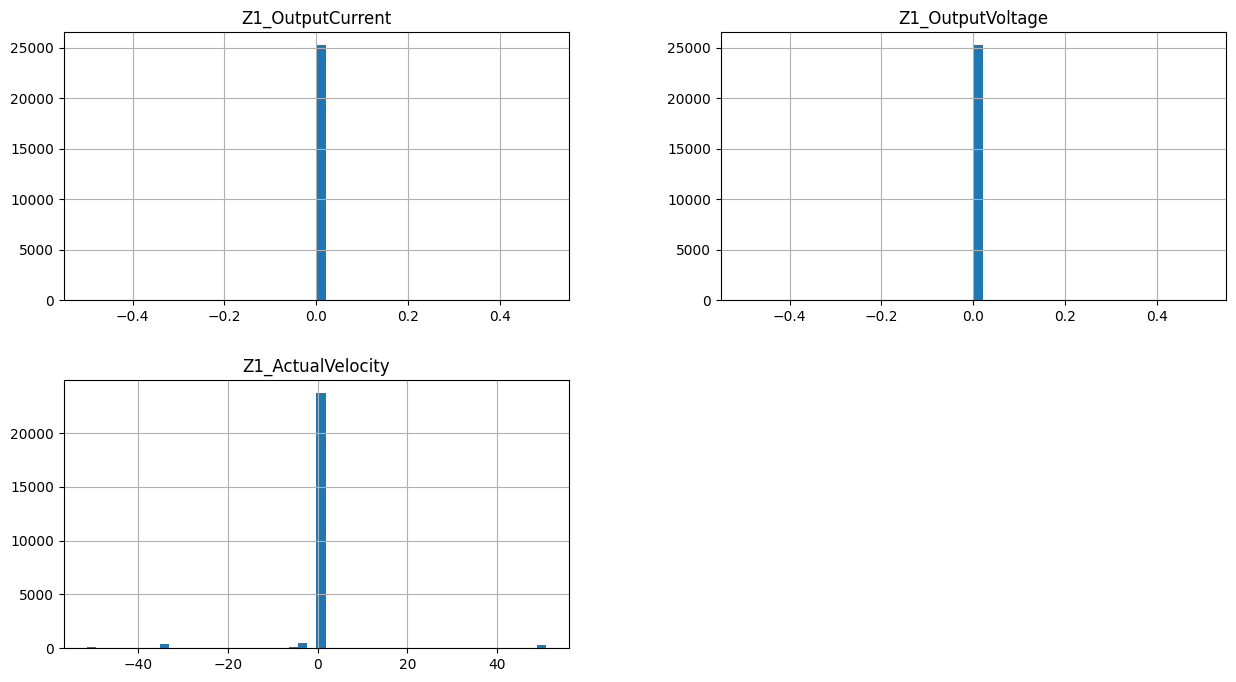

In [ ]:
combined_df[['Z1_OutputCurrent', 'Z1_OutputVoltage', 'Z1_ActualVelocity']].hist(bins=50, figsize=(15,8))

array([[<Axes: title={'center': 'S1_OutputCurrent'}>,
        <Axes: title={'center': 'S1_OutputVoltage'}>],
       [<Axes: title={'center': 'S1_ActualVelocity'}>,
        <Axes: title={'center': 'S1_SystemInertia'}>]], dtype=object)

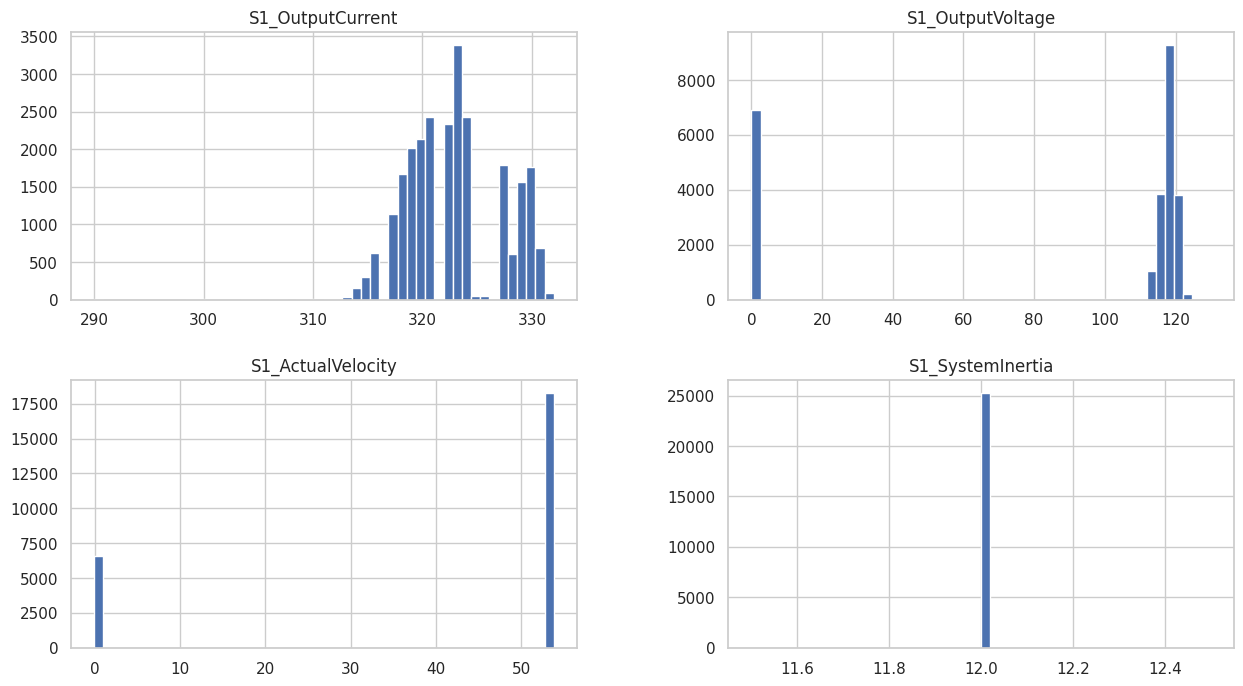

In [ ]:
combined_df[['S1_OutputCurrent', 'S1_OutputVoltage', 'S1_ActualVelocity', 'S1_SystemInertia']].hist(bins=50, figsize=(15,8))



---


##**g. kdeplot**


---



In [ ]:
combined_df['Z1_OutputPower'] = combined_df['Z1_OutputCurrent'] * combined_df['Z1_OutputVoltage']

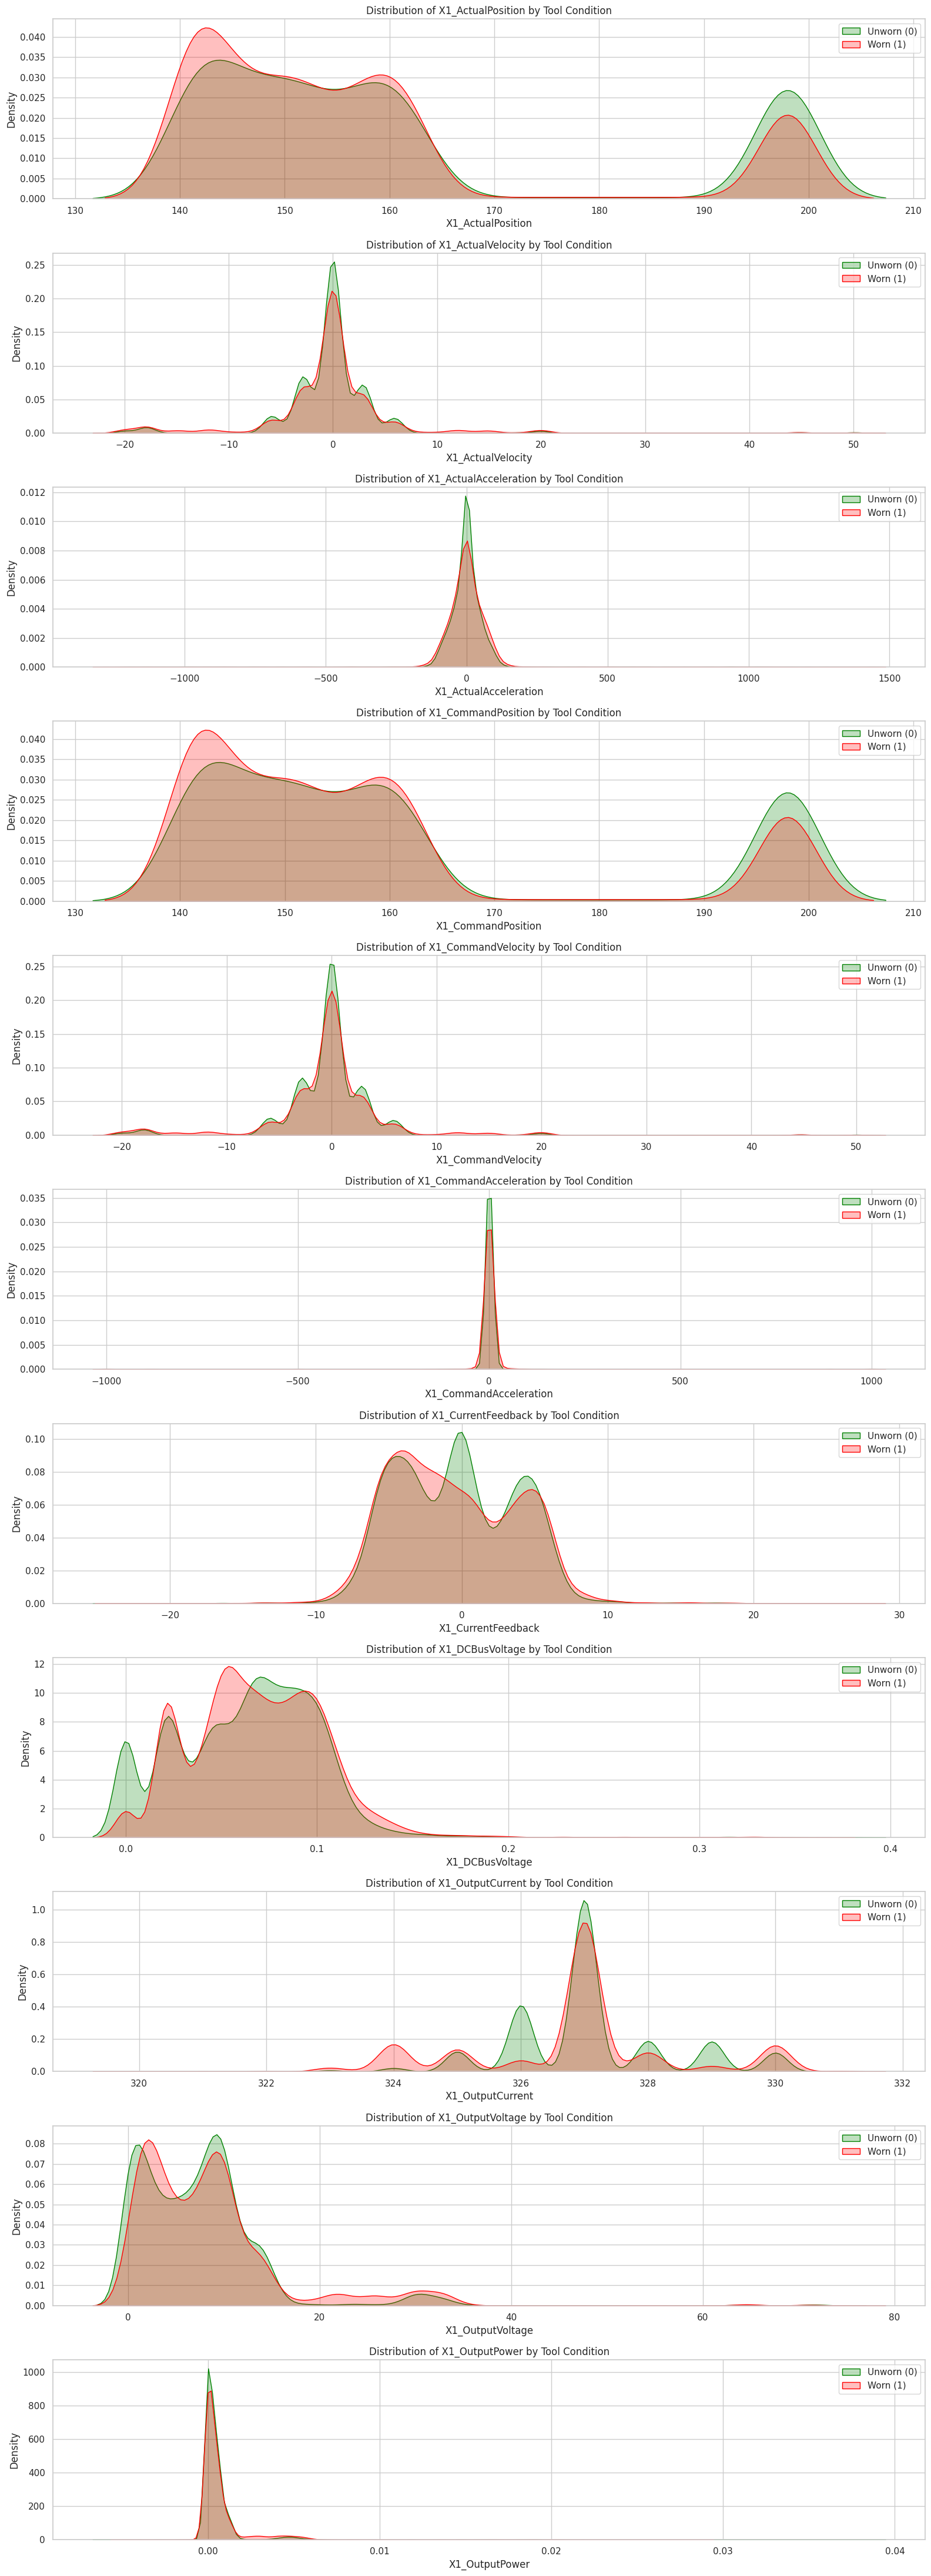

In [ ]:
# Filter X1-related features
x1_features = [col for col in combined_df.columns if col.startswith("X1_")]

# Set style
sns.set(style="whitegrid")

# Plot KDEs
plt.figure(figsize=(16, len(x1_features) * 4))
for i, feature in enumerate(x1_features):
    plt.subplot(len(x1_features), 1, i + 1)
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label='Unworn (0)', fill=True, color="green")
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 1], x=feature, label='Worn (1)', fill=True, color="red")
    plt.title(f"Distribution of {feature} by Tool Condition")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

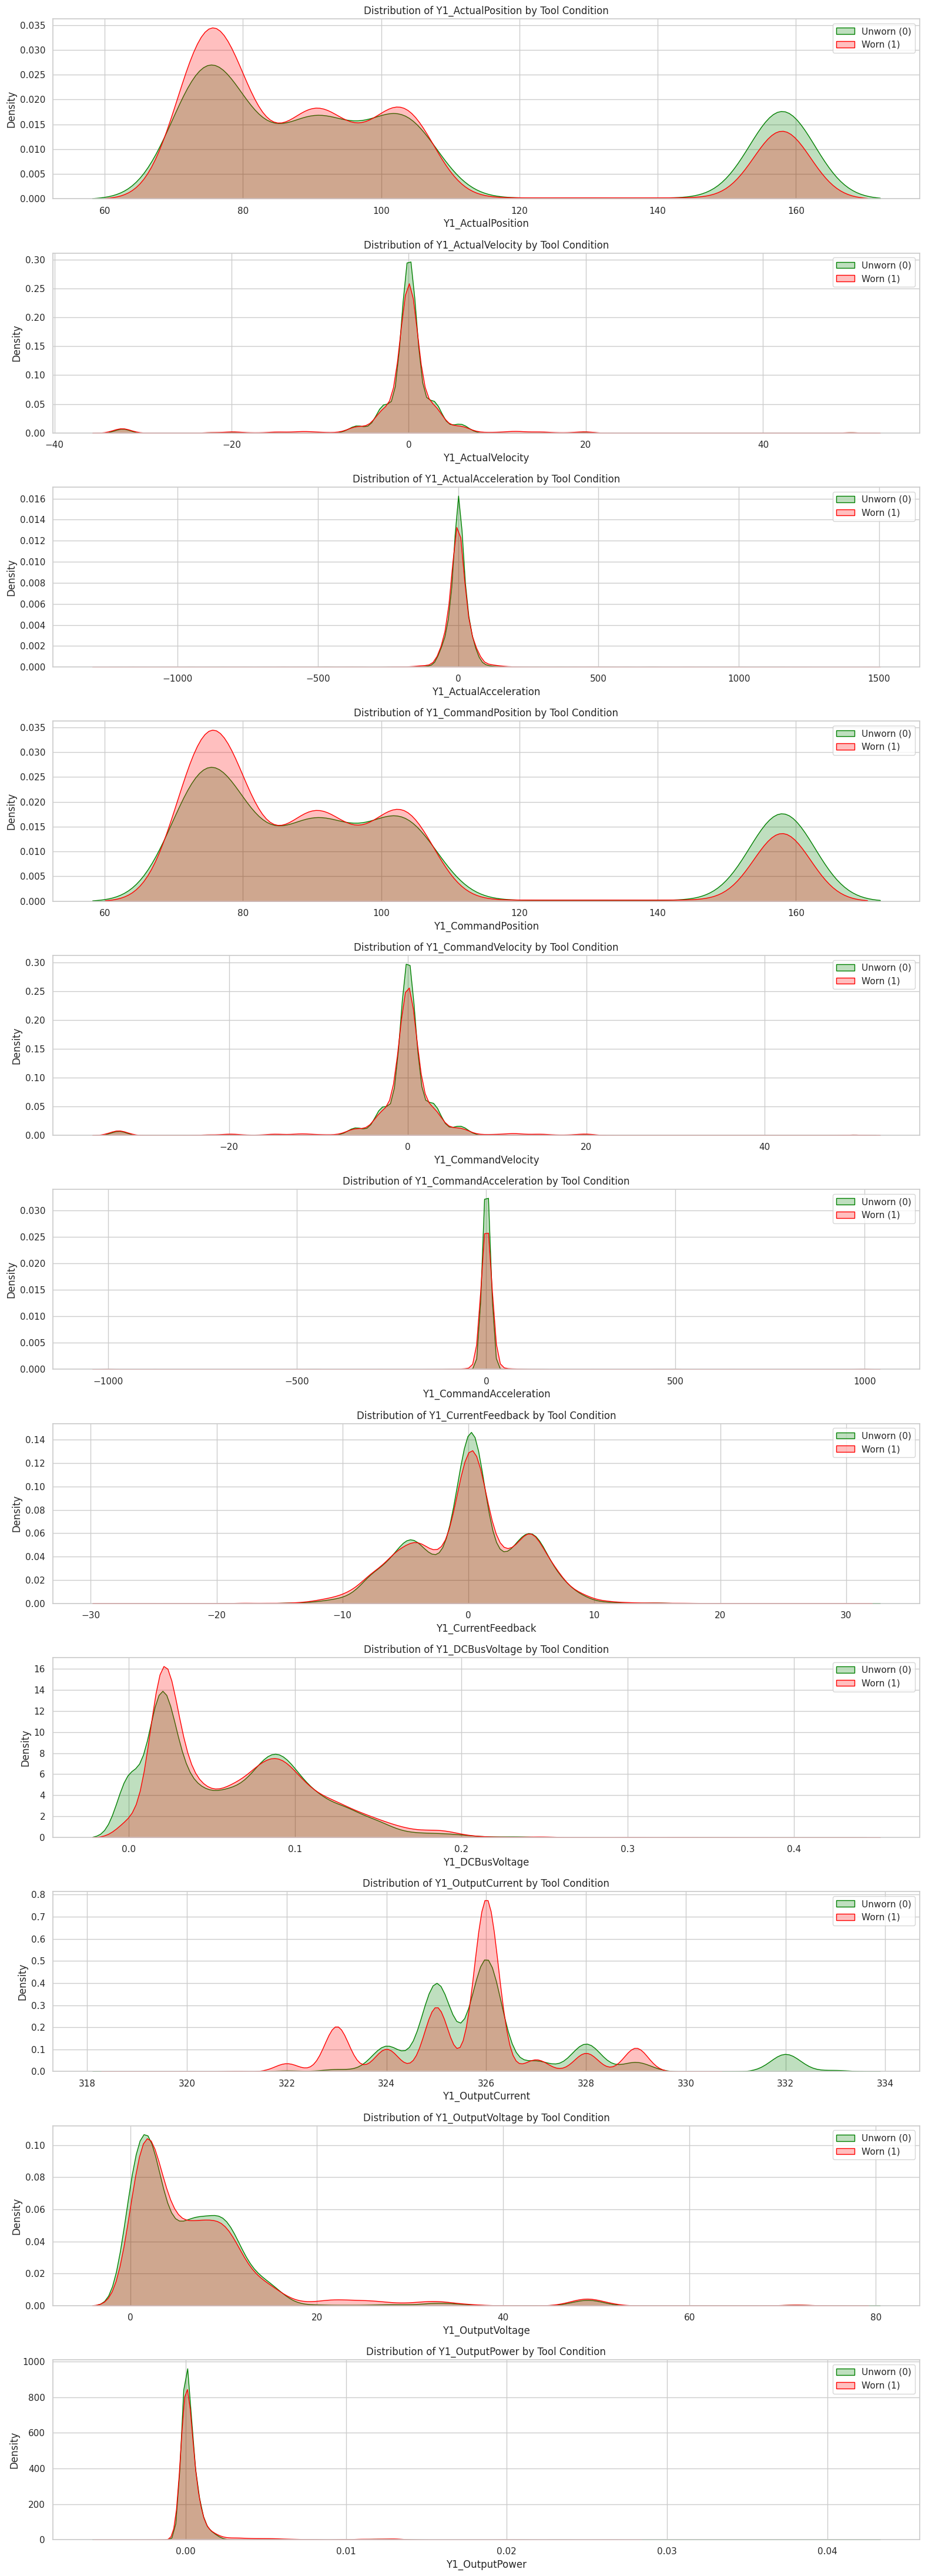

In [ ]:
# Filter Y1-related features
y1_features = [col for col in combined_df.columns if col.startswith("Y1_")]

# Set style
sns.set(style="whitegrid")

# Plot KDEs
plt.figure(figsize=(16, len(y1_features) * 4))
for i, feature in enumerate(y1_features):
    plt.subplot(len(y1_features), 1, i + 1)
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label='Unworn (0)', fill=True, color="green")
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 1], x=feature, label='Worn (1)', fill=True, color="red")
    plt.title(f"Distribution of {feature} by Tool Condition")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-30-2068772306>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label='Unworn (0)', fill=True, color="green")
<ipython-input-30-2068772306>:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 1], x=feature, label='Worn (1)', fill=True, color="red")
<ipython-input-30-2068772306>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-30-2068772306>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label=

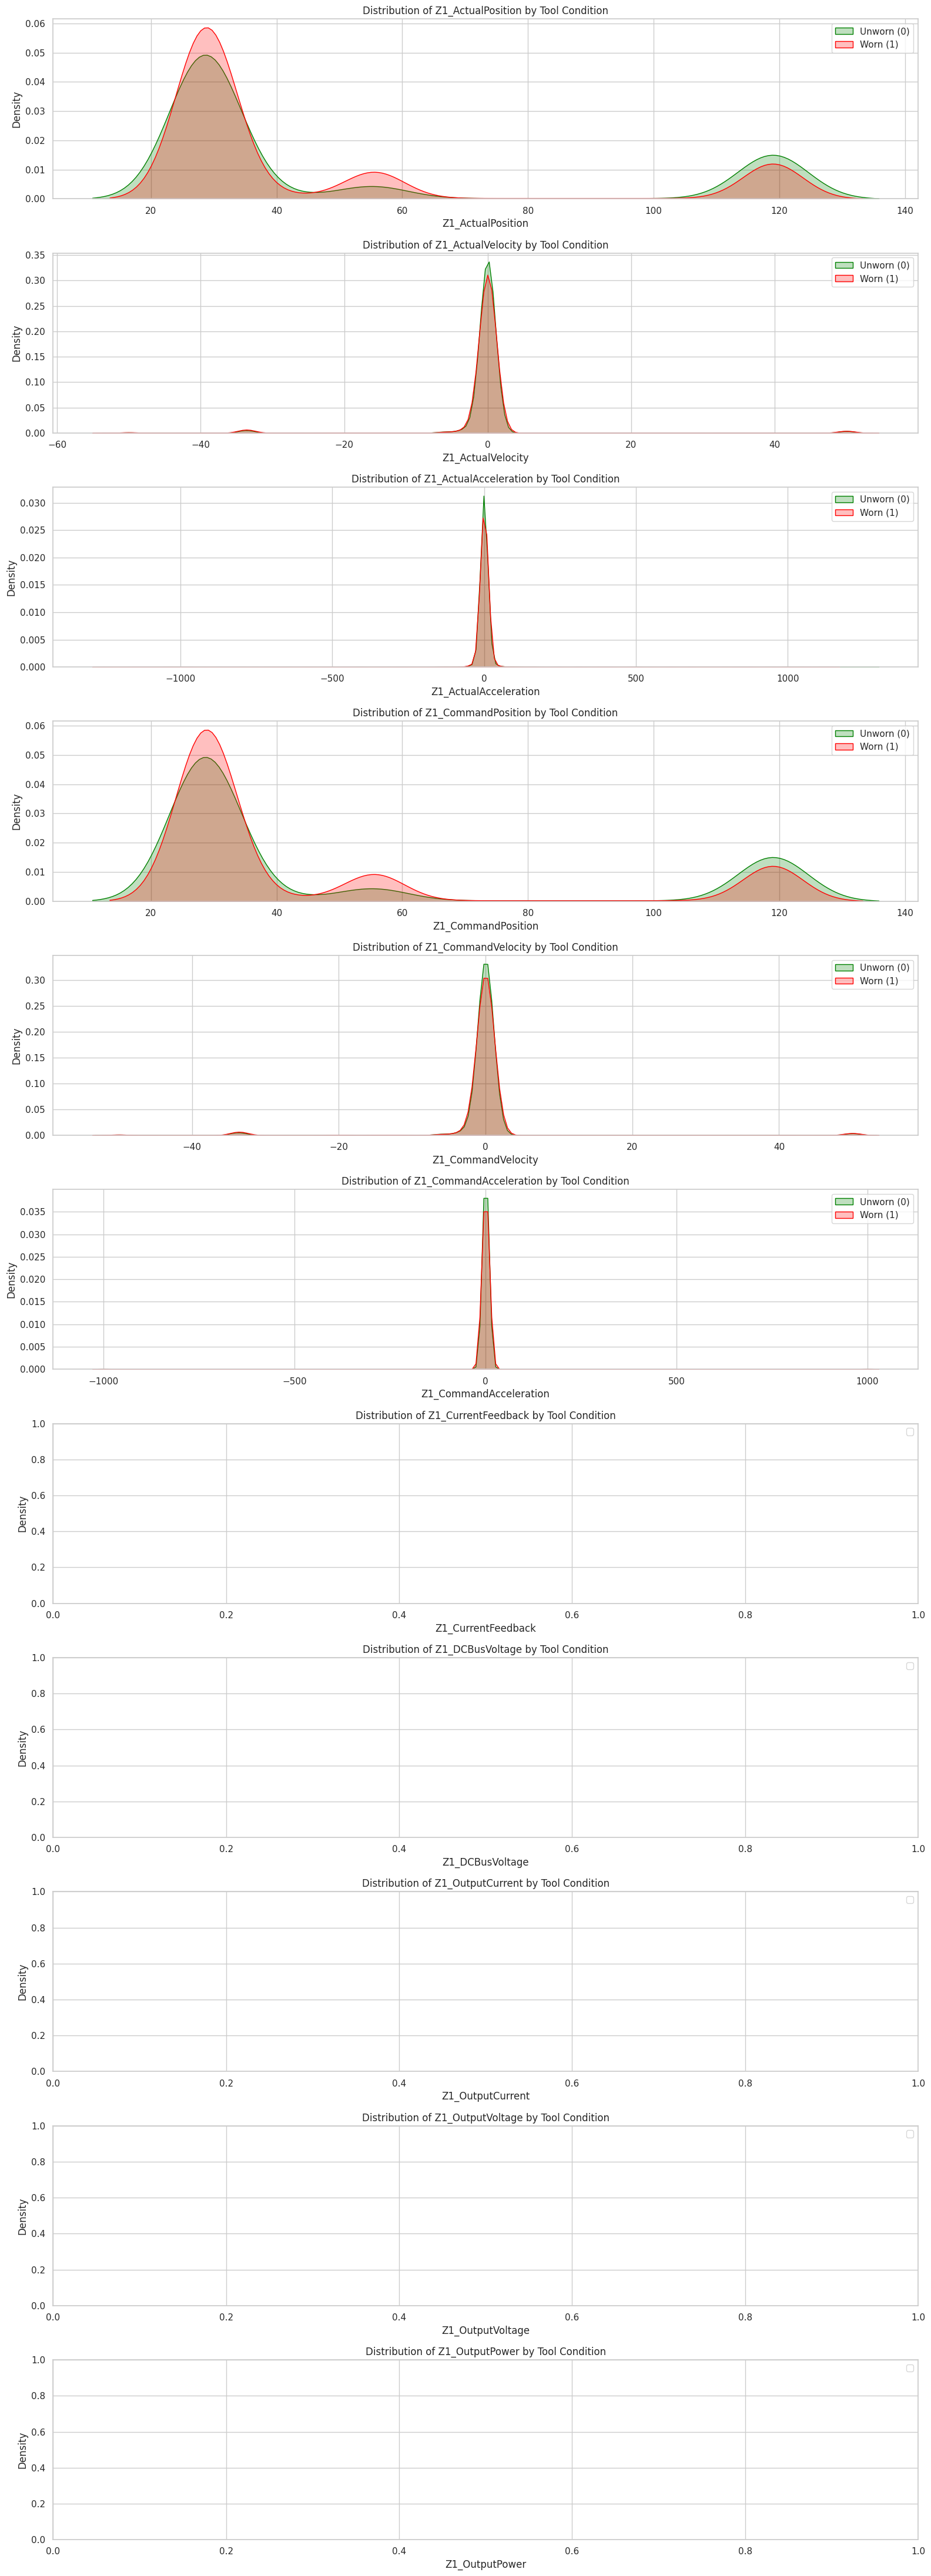

In [ ]:
# Filter Z1-related features
z1_features = [col for col in combined_df.columns if col.startswith("Z1_")]

# Set style
sns.set(style="whitegrid")

# Plot KDEs
plt.figure(figsize=(16, len(z1_features) * 4))
for i, feature in enumerate(z1_features):
    plt.subplot(len(z1_features), 1, i + 1)
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label='Unworn (0)', fill=True, color="green")
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 1], x=feature, label='Worn (1)', fill=True, color="red")
    plt.title(f"Distribution of {feature} by Tool Condition")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-34-2097401927>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label='Unworn (0)', fill=True, color="green")
<ipython-input-34-2097401927>:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 1], x=feature, label='Worn (1)', fill=True, color="red")
<ipython-input-34-2097401927>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


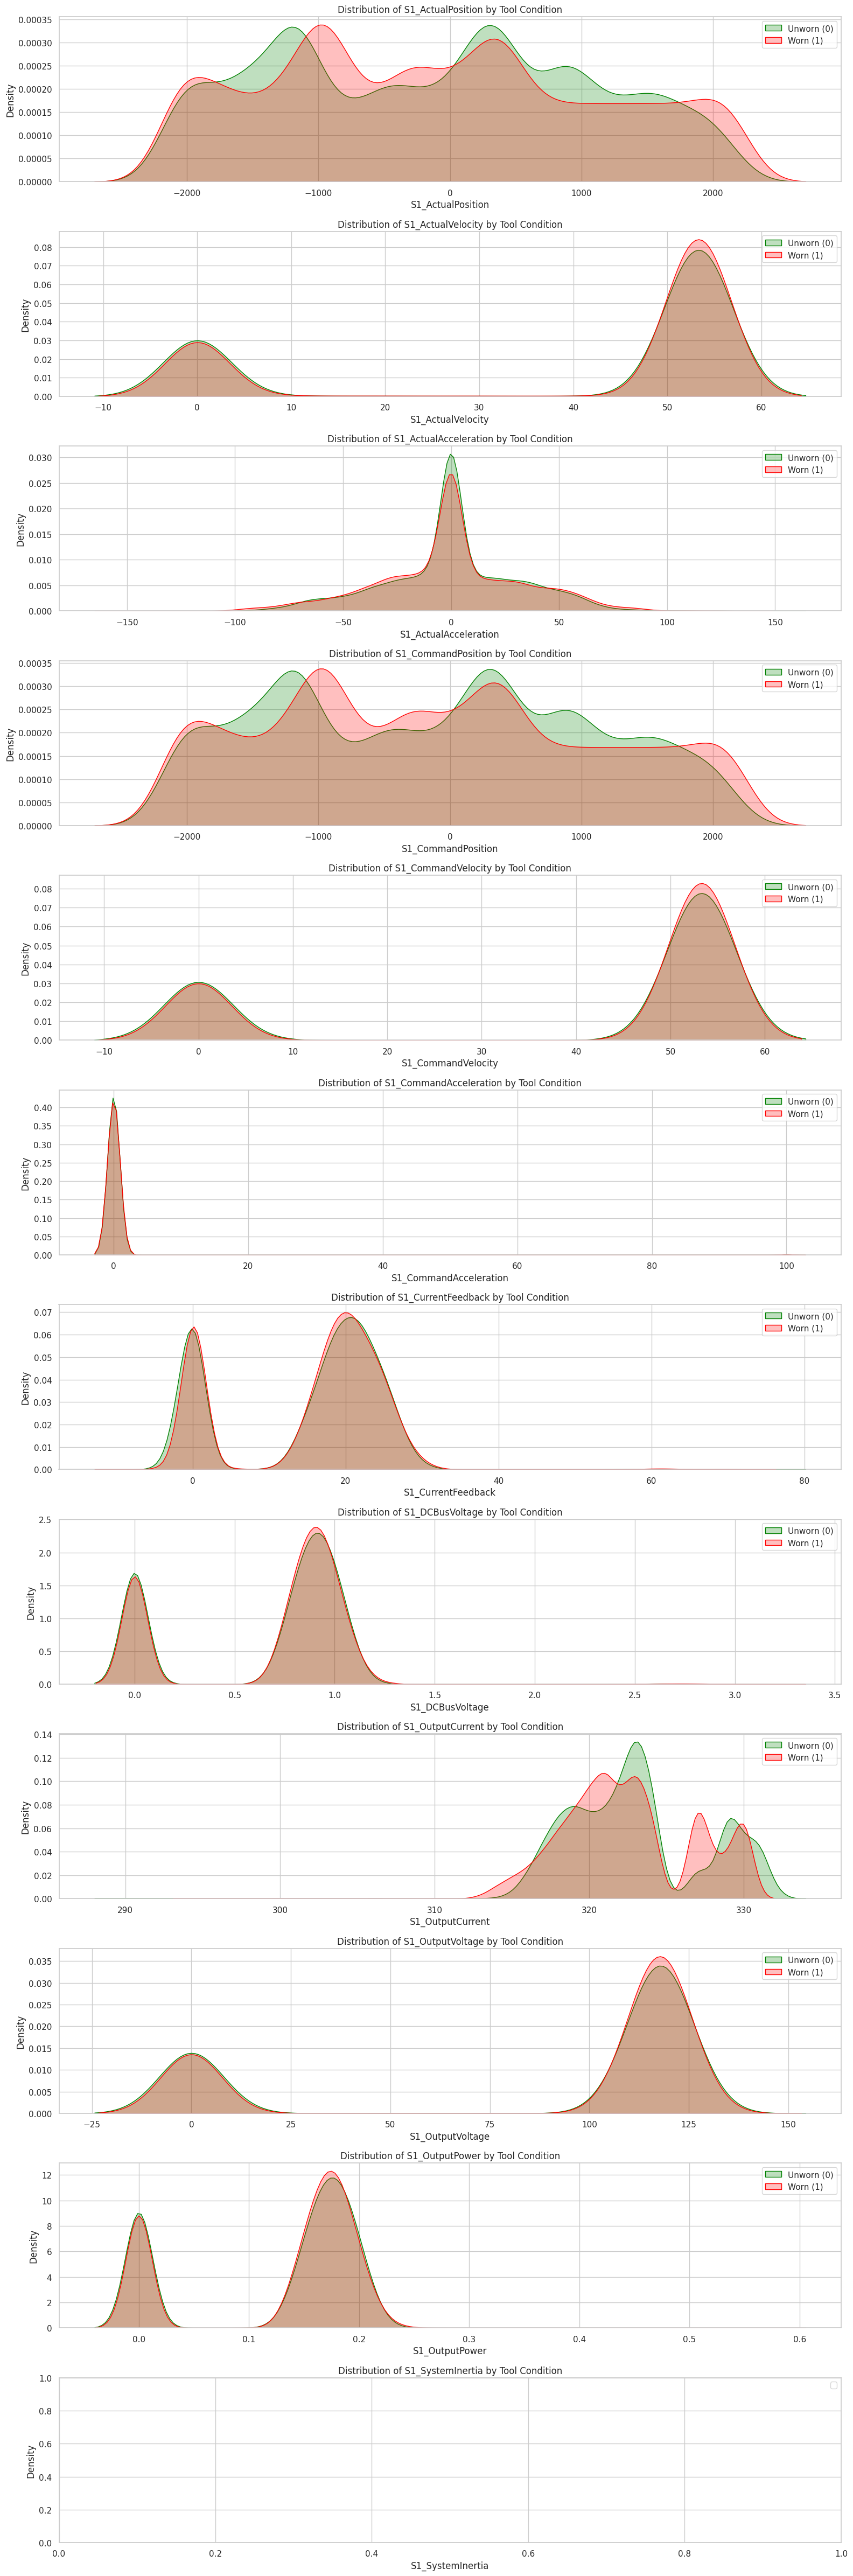

In [ ]:
# Filter S1-related features
s1_features = [col for col in combined_df.columns if col.startswith("S1_")]

# Set style
sns.set(style="whitegrid")

# Plot KDEs
plt.figure(figsize=(16, len(s1_features) * 4))
for i, feature in enumerate(s1_features):
    plt.subplot(len(s1_features), 1, i + 1)
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 0], x=feature, label='Unworn (0)', fill=True, color="green")
    sns.kdeplot(data=combined_df[combined_df["tool_condition"] == 1], x=feature, label='Worn (1)', fill=True, color="red")
    plt.title(f"Distribution of {feature} by Tool Condition")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()



---


##**h. Feature Engineering**


---



In [ ]:
combined_df = combined_df.drop(columns=["material"])
combined_df = combined_df.drop(columns=["machining_finalized"])

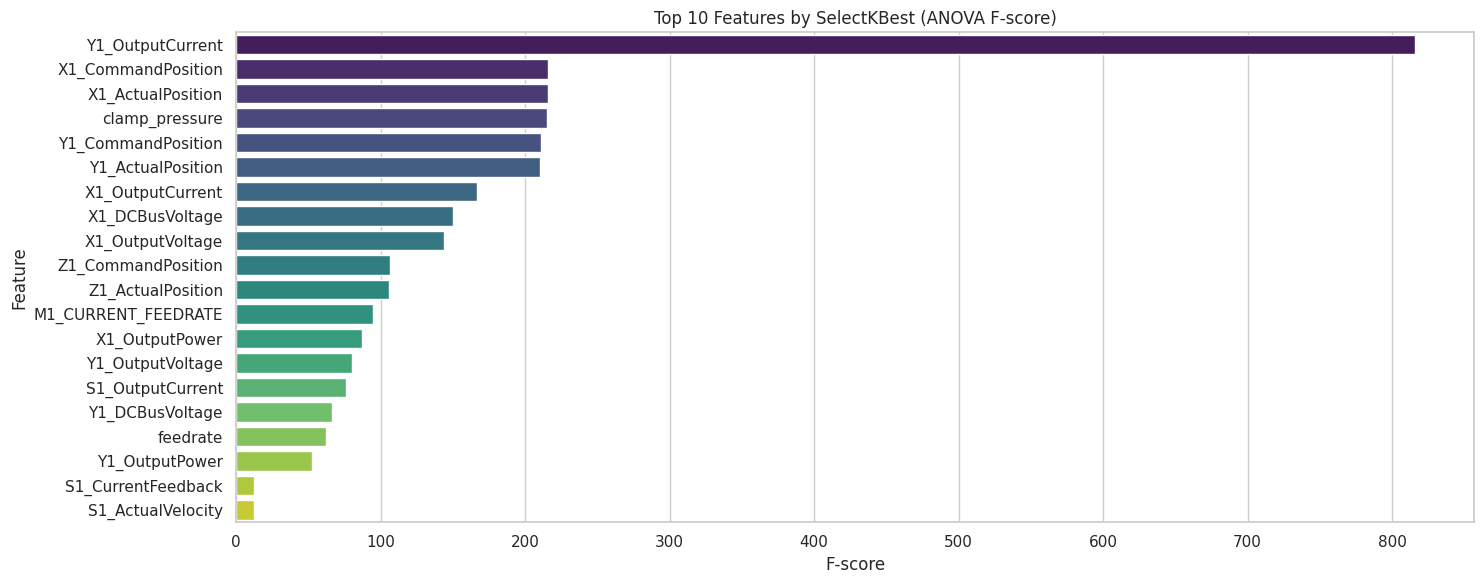

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named combined_df
X = combined_df.drop(columns=["tool_condition"])
y = combined_df["tool_condition"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X_scaled, y)

# Get scores and feature names
scores = selector.scores_
feature_names = X.columns
top_features = pd.Series(scores, index=feature_names).sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Features by SelectKBest (ANOVA F-score)")
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


Selected Features:
 ['X1_ActualPosition', 'X1_CommandPosition', 'X1_DCBusVoltage', 'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition', 'Y1_CommandPosition', 'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage', 'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_CommandPosition', 'S1_ActualVelocity', 'S1_CurrentFeedback', 'S1_OutputCurrent', 'M1_CURRENT_FEEDRATE', 'feedrate', 'clamp_pressure']

🔍 Random Forest
Accuracy: 0.9840
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2396
           1       0.98      0.98      0.98      2662

    accuracy                           0.98      5058
   macro avg       0.98      0.98      0.98      5058
weighted avg       0.98      0.98      0.98      5058

Confusion Matrix:
 [[2356   40]
 [  41 2621]]
Cross-Validation Accuracy (mean ± std): 0.9848 ± 0.0005


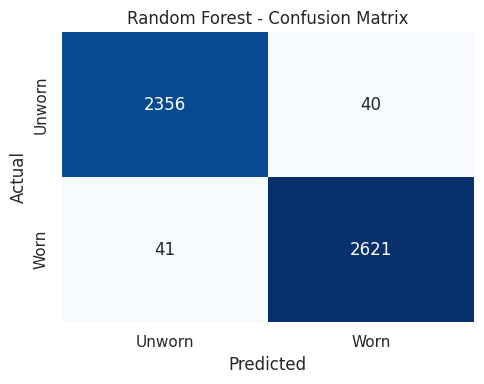


🔍 SVM
Accuracy: 0.7252
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      2396
           1       0.72      0.79      0.75      2662

    accuracy                           0.73      5058
   macro avg       0.73      0.72      0.72      5058
weighted avg       0.73      0.73      0.72      5058

Confusion Matrix:
 [[1561  835]
 [ 555 2107]]
Cross-Validation Accuracy (mean ± std): 0.7249 ± 0.0043


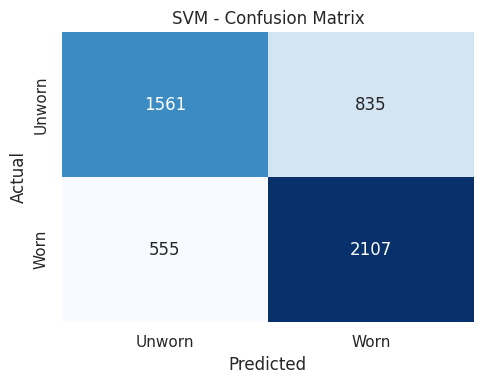


🔍 XGBoost
Accuracy: 0.9858
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2396
           1       0.99      0.99      0.99      2662

    accuracy                           0.99      5058
   macro avg       0.99      0.99      0.99      5058
weighted avg       0.99      0.99      0.99      5058

Confusion Matrix:
 [[2363   33]
 [  39 2623]]
Cross-Validation Accuracy (mean ± std): 0.9852 ± 0.0009


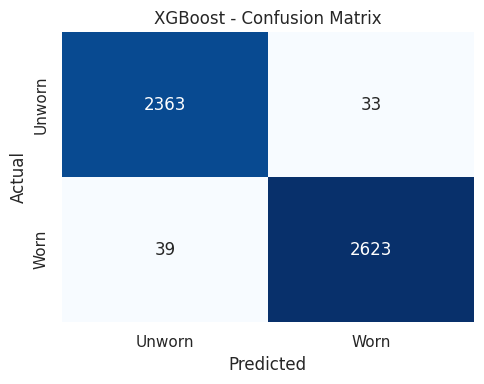

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Select top features using SelectKBest ---
X = combined_df.drop(columns=["tool_condition"])
y = combined_df["tool_condition"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, y)
selected_feature_names = X.columns[selector.get_support()]

print("Selected Features:\n", list(selected_feature_names))

# --- 2. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Train models ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy (mean ± std): {scores.mean():.4f} ± {scores.std():.4f}")

    # --- Confusion Matrix Plot ---
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Unworn", "Worn"], yticklabels=["Unworn", "Worn"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [ ]:
print("Original class distribution:\n", y.value_counts(normalize=True))
print("\nTrain class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))

Original class distribution:
 tool_condition
1    0.526299
0    0.473701
Name: proportion, dtype: float64

Train class distribution:
 tool_condition
1    0.5263
0    0.4737
Name: proportion, dtype: float64

Test class distribution:
 tool_condition
1    0.526295
0    0.473705
Name: proportion, dtype: float64
